## Ön hazırlık Çalışması Kodları

In [138]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

In [139]:
x=[0,1,-1,0,0]
y=[0]
for i in range(1,len(x)): 
    y.append(-0.5*y[i-1]+x[i]+2*x[i-1]) 
print(y)

[0, 1.0, 0.5, -2.25, 1.125]


In [140]:
x=np.array([0,1,-1,0,0],dtype=float)
y=np.array([0,0,0,0,0],dtype=float) 
for i in range(1,len(x)):
    y[i]=-0.5*y[i-1]+x[i]+2*x[i-1]
print(y)

[ 0.     1.     0.5   -2.25   1.125]


In [141]:
x=np.array([0,1,-1,0,0],dtype=float)
b=[1,2] 
a=[1,0.5]
y=signal.lfilter(b,a,x)

print(y)

[ 0.     1.     0.5   -2.25   1.125]


### Fark denklemlerinde giriş ve çıkış sinyallerinin katsayıları kullanılarak signal modülünde bulunan lfilter komutu ile çıkış işaretinin elde edilebileceği görülür.

Text(0.5, 0, 'n')

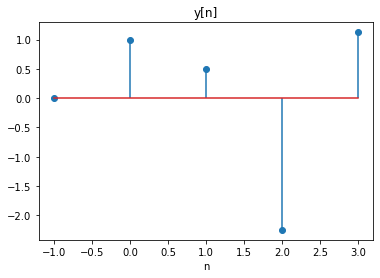

In [142]:
n=np.arange(-1,4) 
plt.stem(n,y) 
plt.title('y[n]') 
plt.xlabel('n')

In [143]:
h=np.array([1,2,-1],dtype=float) 
x=np.array([1,3],dtype=float)
M=len(h) 
N=len(x) 
L=M+N-1
y=np.zeros([L])
for n in range(L):
    y[n]=0 
    for k in range(N):
        if n-k<0 or n-k>=M:    
            h_n_k=0
        else:
            h_n_k=h[n-k] 
        y[n]=y[n]+x[k]*h_n_k
        
print(y)

[ 1.  5.  5. -3.]


In [144]:
h=np.array([1,2,-1],dtype=float) 
x=np.array([1,3],dtype=float) 
print(np.convolve(x,h)) 
print(signal.convolve(x,h))

[ 1.  5.  5. -3.]
[ 1.  5.  5. -3.]


In [145]:
x=np.array([1,0,2,-1]) 
h=np.array([1,0,0,0,3]) 
y=np.convolve(x,h) 
print(y)

[ 1  0  2 -1  3  0  6 -3]


Text(0.5, 1.0, 'y[n]')

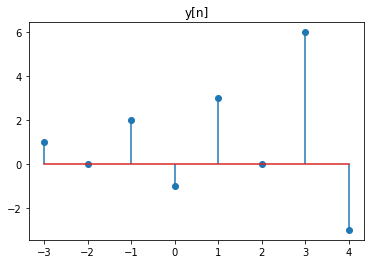

In [146]:
n=np.arange(-3,5) 
plt.stem(n,y) 
plt.title('y[n]')

# ÖDEV 2 - SORU - 1

# 1-a)

## DZD bir sistemin dürtü yanıtı iki şekilde bulunabilmektedir.
## 1-) $ y[n] = x[n] * h[n] $ 
## 2-) $ Y(e^{jw}) = X(e^{jw}).H(e^{jw}) $

## Burada x[n] bilinmeden x[n] ve y[n] arasındaki bağıntı verildiğinden 2. yol tercih edilerek önce $ y[n] = x[n] - x[n-1] $ eşitliğinin fourier transformu alınarak $ \frac {Y(e^{jw})} {X(e^{jw})} $ değeri elde edilir. Bu değer $ H(e^{jw}) $ değerine eşit olduğundan değerin inverse fourier transformu h[n] dürtü yanıtını verir. 

## $ y[n] = x[n] - x[n-1] \Longleftrightarrow Y(e^{jw}) = X(e^{jw}) - X(e^{jw}).e^{-jw} $
## $ Y(e^{jw}) = X(e^{jw}) (1 - e^{-jw}) $
## $ \frac {Y(e^{jw})} {X(e^{jw})} = H(e^{jw}) =  (1 - e^{-jw}) $
## $ H(e^{jw}) =  (1 - e^{-jw}) \Longleftrightarrow \mathit{ h[n] = \delta [n] - \delta [n - 1] } $ olarak bulunur.

# 1-b)

## Sistemin kararlılığı DZD sistemlerde h[n] incelenerek gözlenebilmektedir. h[n] dürtü yanıtının $( { h[n] = \delta [n] - \delta [n - 1] } )$ sadece n = 0'da ve n = 1'de [1 -1] olmak üzere iki değerinin olduğu görülmektedir. Sistemin kararlılığı 
## * $ h[n] = 0 , \space for \space n  < 0 $ şartı ile belirlenir. Bu şart ilgili dürtü yanıtı için sağlandığından sistem KARARLIDIR.  

# 1-c)

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal


24
2
25


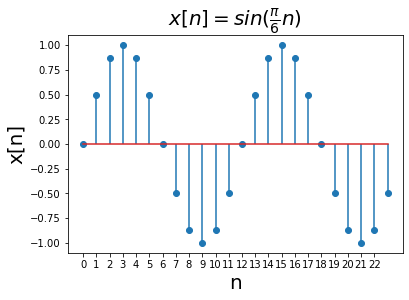

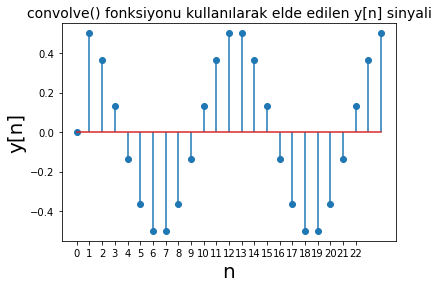

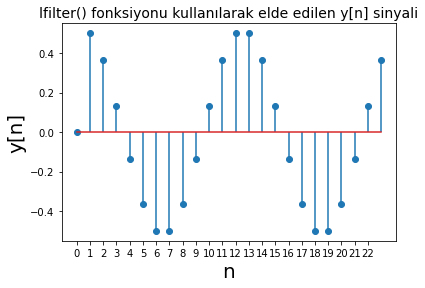

In [5]:
pi = np.pi
# sin sinyali 2pi periyodik bir sinyaldir.
# Böylece x sinyali periyodu N = 12'dir. 2 periyot için 24 değer gerekir.
# Bu yüzden çizim 0,1,2,,,,23 olarak ayarlanmıştır. 
n = np.linspace(0,23,24) 
x = np.zeros(len(n))
h = np.array([1,-1], dtype = float)
print(np.shape(x)[0]) #Length of x
print(np.shape(h)[0]) #Length of n

for i in range(len(n)):
    x[i] = (np.sin(pi*i/6)) # x[n] = sin(pi*n/6)


################### X SIGNAL PLOTTING ###########
plt.stem(n, x,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('x[n]',  fontsize='20') 
 
plt.title(r'$x[n] = sin(\frac{\pi}{6}n)$', fontsize='20') 
###################################################

y = signal.convolve(x,h)


# L değeri konvolüsyon sonucu çıkış sinyalinin eleman sayısıdır.
L = len(x) + len(h) - 1

ny = np.linspace(0, L-1, L)

################ Y SIGNAL PLOTTING (USING CONVOLVE) ###### 
plt.figure()
plt.stem(ny, y,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))   
plt.xlabel('n',  fontsize='20')  
plt.ylabel('y[n]',  fontsize='20') 
plt.title('convolve() fonksiyonu kullanılarak elde edilen y[n] sinyali', fontsize='14') 
########################################################

nz = np.linspace(0, 23, 24)
a = [1,-1]
b = [1, 0]
z = signal.lfilter(a, b, x)
plt.figure()

################ Y SIGNAL PLOTTING (USING LFILTER) ###### 
plt.stem(nz, z,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1)) 
plt.xlabel('n',  fontsize='20')  
plt.ylabel('y[n]',  fontsize='20') 
plt.title('lfilter() fonksiyonu kullanılarak elde edilen y[n] sinyali', fontsize='14') 
#########################################################
plt.show()



# ÖDEV 2 - SORU - 2

# 2-a - SİSTEM - 1)

Text(0.5, 1.0, 'Sistem 1 için h[n] fonksiyonu')

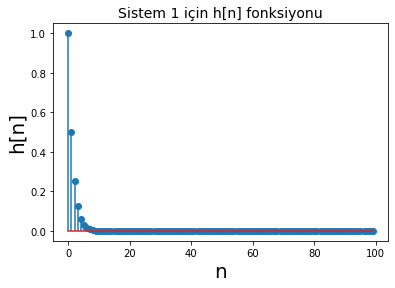

In [149]:
# Sistem 1: y[n] - 1/2*y[n-1] = x[n] 
# x[n] = dirac[n] böylece y[n] = h[n]
# dirac[n] sadece n = 0 ise 1 aksi halde 0
x = np.zeros(100) 
x[0] = 1

# h'ın h[0] değeri sistemde el ile hesaplanır.
# İlk değere bağlı sonraki değerlerin ataması yapılır.
# n = 0 ise x[n] = 1 aksi halde x[n]=0
#y[n] = 1/2*y[n-1], n != 0 oldukça
h = np.zeros(100)
h[0] = 1
n = np.linspace(0,99,100)
for i in range(1,100):
    h[i] = (1/2)*h[i-1] + x[i]


plt.stem(n, h,  use_line_collection=True)
plt.xlabel('n',  fontsize='20')  
plt.ylabel('h[n]',  fontsize='20') 
plt.title('Sistem 1 için h[n] fonksiyonu', fontsize='14') 

# 2-a SİSTEM - 2)

Text(0.5, 1.0, 'Sistem 1 için h[n] fonksiyonu')

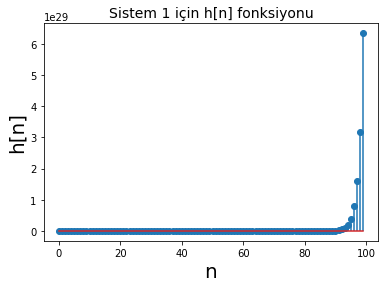

In [150]:
# Sistem 2: y[n] - 2*y[n-1] = x[n] 
x = np.zeros(100) # x[n] = dirac[n] böylece y[n] = h[n]
x[0] = 1
h = np.zeros(100)
h[0] = 1
n = np.linspace(0,99,100)
for i in range(1,100):
    h[i] = (2)*h[i-1] + x[i]


plt.stem(n, h,  use_line_collection=True)
plt.xlabel('n',  fontsize='20')  
plt.ylabel('h[n]',  fontsize='20') 
plt.title('Sistem 1 için h[n] fonksiyonu', fontsize='14') 

# 2-b)

## $\sum_{n=-\infty}^\infty |h[n]| < \infty  $ eşitsizliği sağlanan DZD sistemler kararlıdır. Sistem 1'de     $ h[n] = \sum_{n=0}^\infty \frac {1} {2} ^n $ olduğu görülmektedir. Sistem 1'e ait dürtü yanıtının sonucu geometrik seri toplamı kuralına göre sonludur( $\sum_{n=0}^\infty \alpha ^n  = \frac {1} {1 - \alpha ^n}< \infty \space if \space | \alpha | < 1  $ ). Böylece Sistem 1 $\alpha = \frac {1} {2} $ olduğundan kararlıdır. Sistem 2 ise aynı seri toplamında  $\alpha = 2 $ olduğundan toplam sonsuza ıraksar ve Sistem 2 kararsızdır.

# Sistem - 1 $\Rightarrow$ KARARLI
# Sistem - 2 $\Rightarrow$ KARARSIZ

# 2-c)

## DZD bir sistemin nedenselliği h[n] bilgisi kullanılarak aşağıdaki koşul ile elde edilebilir. 

# $ h[n] = 0 \space for \space n < 0 $ ise sistem nedenseldir. Böylece her iki sistemin nedensel olduğu görülmektedir.

# Sistem - 1 $\Rightarrow$ NEDENSEL
# Sistem - 2 $\Rightarrow$ NEDENSEL

# ÖDEV 2 - SORU - 3

In [151]:
def dirac (n):
    if n == 0:
        return 1
    else:
        return 0

def h_func_sistem_one(n):
    return (1/3)*(dirac(n+1) + dirac(n) + dirac(n-1))

def h_func_sistem_two(n):
    return (dirac(n) - dirac(n-3))


def x_func_one(n):
    return np.cos(pi*n/5)

def x_func_two(n):
    return ((-0.3)**n)



# 3-a) SİSTEM - 1 

Text(0.5, 1.0, 'y[n] signal for system 1 ')

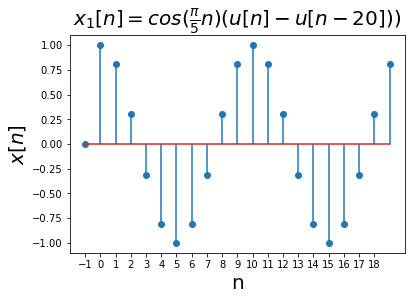

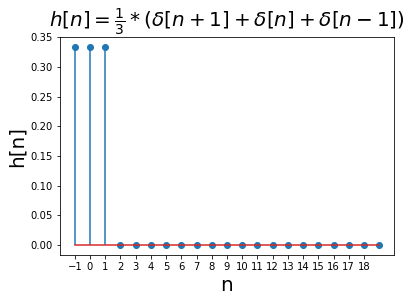

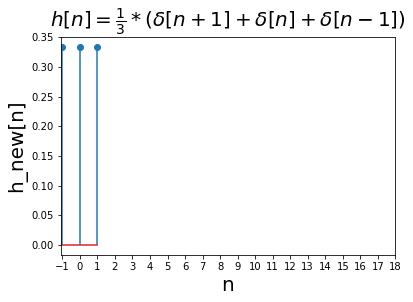

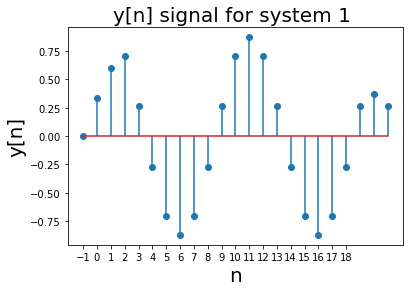

In [152]:

pi = np.pi
n = np.linspace(-1,19,21)  # u[n] - u[n-20]
x = np.zeros(len(n))
h = np.zeros(len(n))

for i in range(-1,len(n)-1):
    x[i+1] = x_func_one(i)
    h[i+1] = h_func_sistem_one(i)
    # x sinyali n < 0 ve n > 19 için sıfır olmalı 
    if(i < 0 or i > 19):
        x[i+1] = 0

######################### X SIGNAL PLOTTING ########################################

plt.stem(n, x,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('$x[n]$',  fontsize='20') 
plt.title(r'$x_1[n] = cos(\frac{\pi}{5}n)(u[n] - u[n-20]))$', fontsize='20') 

####################################################################################



######################### H SIGNAL PLOTTING ########################################

plt.figure()
plt.stem(n, h,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('h[n]',  fontsize='20') 
plt.title(r'$h[n] = \frac{1}{3}*(\delta[n+1] + \delta[n] + \delta[n-1])$', fontsize='20') 

####################################################################################



# H SIGNAL HAVE ZEROS THEN REMOVE THEM FOR CLEAR Y SIGNAL

h_new = np.delete(h,[range(3,21)],0)
nh = np.linspace(-1,1,3)


######################### H_NEW SIGNAL PLOTTING ########################################

plt.figure()
plt.stem(nh, h_new,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('h_new[n]',  fontsize='20') 

plt.title(r'$h[n] = \frac{1}{3}*(\delta[n+1] + \delta[n] + \delta[n-1])$', fontsize='20') 

####################################################################################


# H SIGNAL COMMENT
# Yorum kısmında .(çarpım) *(konvolüsyon) anlamına gelmektedir.
# x sinyali a1x.dirac(n+1) + a2x.dirac(n) + a3x.dirac(n-1).....a21x.dirac(n-19)
# h sinyali a1h.dirac(n+1) + a2h.dirac(n) + a3h.dirac(n-1).....a21h.dirac(n-19)
# Bu durumda y sinyalini oluşturan n alt değeri;
# a1x.dirac(n+1) * a1h.dirac(n+1) = a1y.dirac(n+2)
# Üst değeri ise;
# a21x.dirac(n-19) * a21h.dirac(n-19) = a41y.dirac(n-38)
# olarak belirlenir, Böylece n = -2,-1,0,1,2,,,,,,38 ile y sinyali çizilir.

#H_NEW SIGNAL COMMENT
# h sinyali 3 eleman dışında sıfır değer aldığından
#3 elemanlı olarak ayarlanabilir böylece y çizimi;
# n = -2,-1,0,,,,20 için olur. h sinyalinin sıfır aldığı değerleri array elemanına atmadan
# yapılan çizim daha doğru olacaktır.Bu yüzden h_new kullanılır.

# Y SIGNAL 
y = signal.convolve(x,h_new) 
ny = np.linspace(-1,21,23)

######################### Y SIGNAL PLOTTING ########################################
# PLOT THE Y SIGNAL 
plt.figure()
plt.stem(ny, y,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('y[n]',  fontsize='20') 
 
plt.title('y[n] signal for system 1 ', fontsize='20') 

####################################################################################

# 3-a) SİSTEM - 2 

Text(0.5, 1.0, 'y[n] signal for system 2 ')

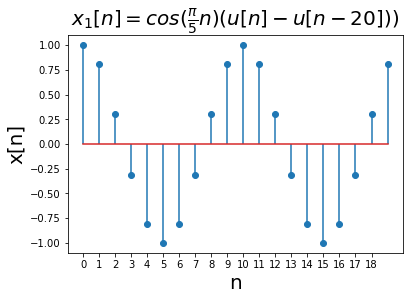

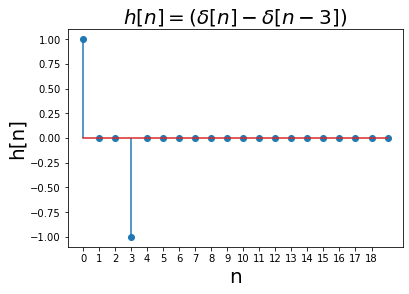

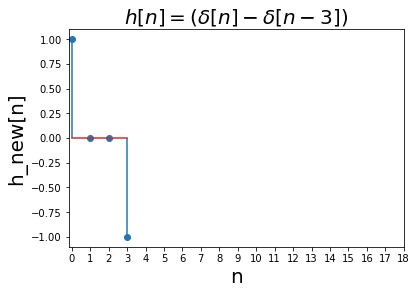

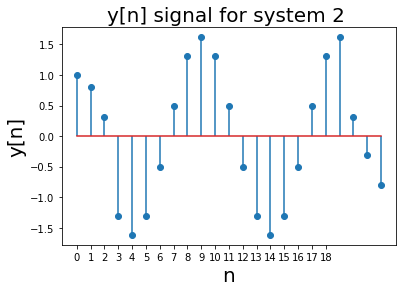

In [153]:

pi = np.pi
n = np.linspace(0,19,20) # u[n] - u[n-20]
x = np.zeros(len(n))
h = np.zeros(len(n))

for i in range(len(n)):
    x[i] = x_func_one(i)
    h[i] = h_func_sistem_two(i)


######################### X SIGNAL PLOTTING ########################################

plt.stem(n, x,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('x[n]',  fontsize='20') 
plt.title(r'$x_1[n] = cos(\frac{\pi}{5}n)(u[n] - u[n-20]))$', fontsize='20') 

####################################################################################



######################### H SIGNAL PLOTTING ########################################

plt.figure()
plt.stem(n, h,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('h[n]',  fontsize='20') 
plt.title(r'$h[n] = (\delta[n] - \delta[n-3])$', fontsize='20') 

####################################################################################



# H SIGNAL HAVE ZEROS THEN REMOVE THEM FOR CLEAR Y SIGNAL

h_new = np.delete(h,[range(4,20)],0)
nh = np.linspace(0,3,4)


######################### H_NEW SIGNAL PLOTTING ########################################

plt.figure()
plt.stem(nh, h_new,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('h_new[n]',  fontsize='20') 

plt.title(r'$h[n] = (\delta[n] - \delta[n-3])$', fontsize='20') 

####################################################################################

# Y SIGNAL 
y = signal.convolve(x,h_new) 
ny = np.linspace(0,22,23)

######################### Y SIGNAL PLOTTING ########################################
# PLOT THE Y SIGNAL 
plt.figure()
plt.stem(ny, y,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('y[n]',  fontsize='20') 
 
plt.title('y[n] signal for system 2 ', fontsize='20') 
####################################################################################

# 3-b) SİSTEM - 1 

8
[0.33333333 0.33333333 0.33333333]


Text(0.5, 1.0, 'y[n] signal for system 1 ')

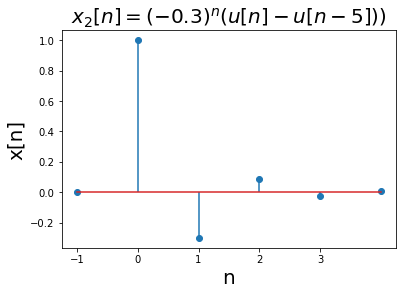

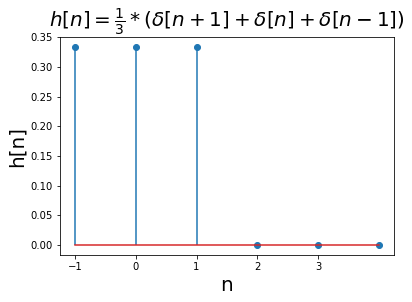

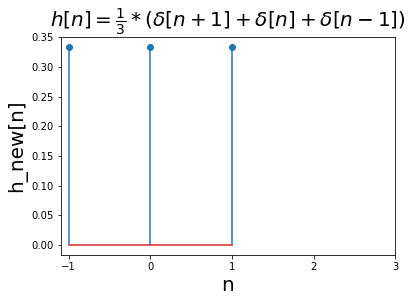

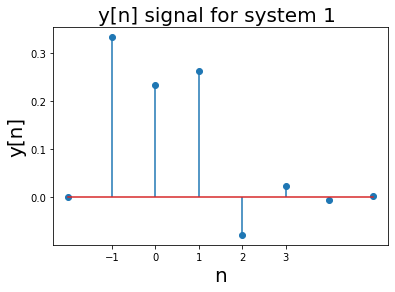

In [154]:

pi = np.pi
n = np.linspace(-1,4,6)  # u[n] - u[n-5]
x = np.zeros(len(n))
h = np.zeros(len(n))

for i in range(-1,len(n)-1):
    x[i+1] = x_func_two(i)
    h[i+1] = h_func_sistem_one(i)
    # x sinyali n < 0 ve n > 19 için sıfır olmalı 
    if(i < 0 or i > 4):
        x[i+1] = 0

######################### X SIGNAL PLOTTING ########################################

plt.stem(n, x,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('x[n]',  fontsize='20') 
plt.title(r'$x_2[n] = (-0.3)^n(u[n] - u[n-5]))$', fontsize='20') 

####################################################################################



######################### H SIGNAL PLOTTING ########################################

plt.figure()
plt.stem(n, h,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('h[n]',  fontsize='20') 
plt.title(r'$h[n] = \frac{1}{3}*(\delta[n+1] + \delta[n] + \delta[n-1])$', fontsize='20') 

####################################################################################



# H SIGNAL HAVE ZEROS THEN REMOVE THEM FOR CLEAR Y SIGNAL

h_new = np.delete(h,[3,4,5],0)
nh = np.linspace(-1,1,3)


######################### H_NEW SIGNAL PLOTTING ########################################

plt.figure()
plt.stem(nh, h_new,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('h_new[n]',  fontsize='20') 

plt.title(r'$h[n] = \frac{1}{3}*(\delta[n+1] + \delta[n] + \delta[n-1])$', fontsize='20') 

####################################################################################


# Y SIGNAL 
y = signal.convolve(x,h_new) 
print(len(y))
print(h_new)
ny = np.linspace(-2,5,8)

######################### Y SIGNAL PLOTTING ########################################
# PLOT THE Y SIGNAL 
plt.figure()
plt.stem(ny, y,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('y[n]',  fontsize='20') 
 
plt.title('y[n] signal for system 1 ', fontsize='20') 
####################################################################################


# 3-b) SİSTEM - 2

Text(0.5, 1.0, 'y[n] signal for system 2 ')

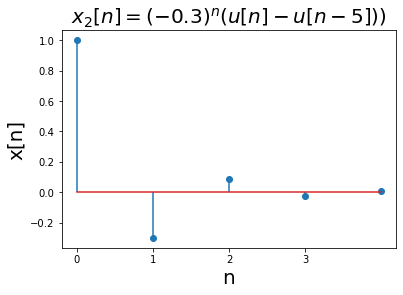

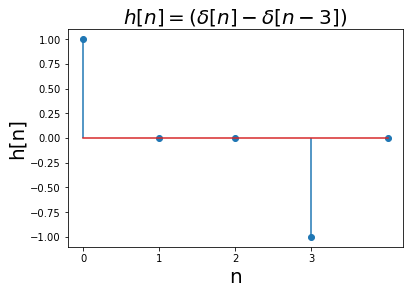

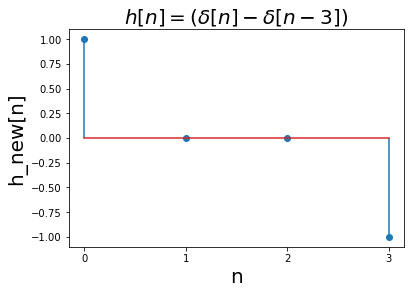

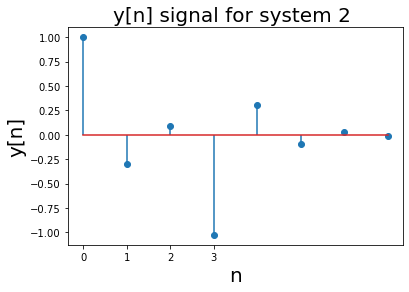

In [155]:

pi = np.pi
n = np.linspace(0,4,5) # u[n] - u[n-5]
x = np.zeros(len(n))
h = np.zeros(len(n))

for i in range(len(n)):
    x[i] = x_func_two(i)
    h[i] = h_func_sistem_two(i)


######################### X SIGNAL PLOTTING ########################################

plt.stem(n, x,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('x[n]',  fontsize='20') 
plt.title(r'$x_2[n] = (-0.3)^n(u[n] - u[n-5]))$', fontsize='20') 

####################################################################################



######################### H SIGNAL PLOTTING ########################################

plt.figure()
plt.stem(n, h,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('h[n]',  fontsize='20') 
plt.title(r'$h[n] = (\delta[n] - \delta[n-3])$', fontsize='20') 

####################################################################################



# H SIGNAL HAVE ZEROS THEN REMOVE THEM FOR CLEAR Y SIGNAL

h_new = np.delete(h,[4],0)
nh = np.linspace(0,3,4)


######################### H_NEW SIGNAL PLOTTING ########################################

plt.figure()
plt.stem(nh, h_new,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('h_new[n]',  fontsize='20') 

plt.title(r'$h[n] = (\delta[n] - \delta[n-3])$', fontsize='20') 

####################################################################################

# Y SIGNAL 
y = signal.convolve(x,h_new) 
ny = np.linspace(0,7,8)

######################### Y SIGNAL PLOTTING ########################################
# PLOT THE Y SIGNAL 
plt.figure()
plt.stem(ny, y,  use_line_collection=True)
plt.xticks(np.arange(n[0],n[-1],1))     
plt.xlabel('n',  fontsize='20')  
plt.ylabel('y[n]',  fontsize='20') 
 
plt.title('y[n] signal for system 2 ', fontsize='20') 


####################################################################################

## 3-a) Sistem 1'de kod içerisinde yorumlandığı gibi konvolüsyonu alınan giriş sinyali ve dürtü cevabı $\sum_{k=-\infty}^\infty a_k \delta [n-k] $' formatında yazılabiliyorsa çıkış sinyalinin hangi aralıkta çizileceği bilgisi elde edilir. Bunun için en basit yöntem giriş ve dürtü sinyallerinin $ \delta [n-k] $ değerlerinde k'nın en küçük ve en büyük değerleri bulunmalıdır. x ve h sinyallerinin en küçük iki k değerine sahip noktalarının konvolüsyonları y'nin çizim başlangıç noktasını verirken, en büyük iki k değeri ise y nin bitiş noktasını verir. $ x_k \delta [n-xk_min] *  h_k \delta [n-hk_min] =  y_k \delta [n-yk_min]$ burada dirac sinyalinin konvolüsyon özelliği ile $ yk_min = xk_min + hk_min $ olur ve aynı işlem bitiş noktası için de uygulanarak sınır değerleri çizilebilmiş olur.